In [1]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from env import StaticGridEnv

pygame 2.6.1 (SDL 2.28.4, Python 3.10.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
env = StaticGridEnv(seed=42)  # Seed 

# Task 1

In [3]:
#QLearning parameters
alpha = 0.08        
gamma = 0.95       
epsilon = 1.0      
epsilon_decay = 0.997  
min_epsilon = 0.03    
episodes = 10000   
max_steps = 100    

QLearning Table (10x10 grid, 4 possible actions)

In [4]:
Q_table = np.zeros((10, 10, 4))

rewards_per_episode = []
steps_per_episode = []
successful_episodes = 0


In [5]:
for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0
    steps = 0

    for _ in range(max_steps):
        agent_pos = (state[0], state[1])

        # epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            # Exploration: choosing any random action
            action = random.choice([0, 1, 2, 3])
        else:
            # Exploitation: choosing the action with the highest Q-value
            action = np.argmax(Q_table[agent_pos])

        next_state, reward, done, _ = env.step(action)
        next_agent_pos = (next_state[0], next_state[1])

        # Updating Q-value using the Q-learning formula
        Q_table[agent_pos][action] = Q_table[agent_pos][action] + alpha * (reward + gamma * np.max(Q_table[next_agent_pos]) - Q_table[agent_pos][action])

        total_reward += reward
        steps += 1
        state = next_state

        if done:
            successful_episodes += 1
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    rewards_per_episode.append(total_reward)
    steps_per_episode.append(steps)


Plotting the Cumulative Rewards for QLearning Agent and printing the required metrics

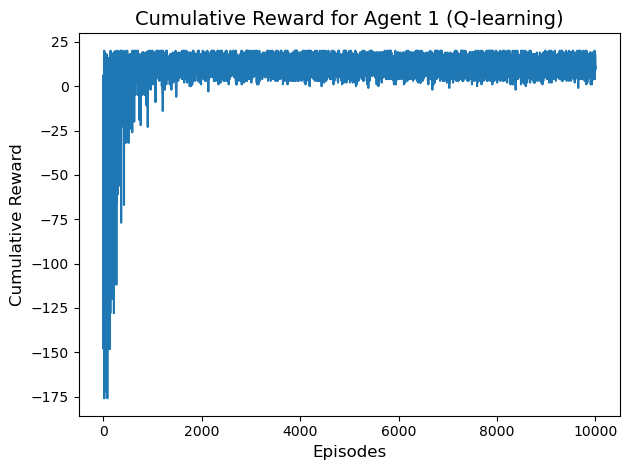

Agent 1 (Q-learning) - Success Rate: 99.24%

Agent 1 (Q-learning) - Average Reward: 9.87

Agent 1 (Q-learning) - Average Learning Speed: 0.0933


In [6]:
# Plot cumulative rewards per episode
plt.plot(np.arange(episodes), rewards_per_episode, label="Cumulative Reward")
plt.title('Cumulative Reward for Agent 1 (Q-learning)', fontsize=14)
plt.xlabel('Episodes', fontsize=12)
plt.ylabel('Cumulative Reward', fontsize=12)
plt.tight_layout()
plt.show()

# Success Rate
success_rate_q = (successful_episodes / episodes) * 100
# Average Reward per Episode
average_reward_q = np.mean(rewards_per_episode)
# Average Learning Speed
average_learning_speed_q = 1 / np.mean(steps_per_episode)

#Printing
print(f"Agent 1 (Q-learning) - Success Rate: {success_rate_q:.2f}%\n")
print(f"Agent 1 (Q-learning) - Average Reward: {average_reward_q:.2f}\n")
print(f"Agent 1 (Q-learning) - Average Learning Speed: {average_learning_speed_q:.4f}")

# Task 2

In [7]:
state_space_size = 17  
action_space_size = env.action_space 

In [8]:
# Initializing
observation_space_size = env.observation_space
action_space_size = env.action_space
Q_table_sarsa = np.zeros((state_space_size, action_space_size))
total_rewards_sarsa = []
steps_per_episode_sarsa = []
successful_episodes_sarsa = 0

SARSA Parameters

In [9]:
alpha_sarsa = 0.09  
gamma_sarsa = 0.99  
epsilon_sarsa = 1.0  
epsilon_decay_sarsa = 0.996  
min_epsilon_sarsa = 0.01  
episodes_sarsa = 10000  
max_steps_sarsa = 100  

Q Table for SARSA (10x10 grid, 4 possible actions)

In [10]:
Q_table_sarsa = np.zeros((10, 10, 4))

rewards_per_episode_sarsa = []
steps_per_episode_sarsa = []
successful_episodes_sarsa = 0

# SARSA Training Loop
for episode in range(episodes_sarsa):
    state = env.reset()
    done = False
    total_reward = 0
    steps = 0

    # epsilon-greedy policy
    agent_pos = (state[0], state[1])
    if random.uniform(0, 1) < epsilon_sarsa:
        action = random.choice([0, 1, 2, 3])  # Exploration
    else:
        action = np.argmax(Q_table_sarsa[agent_pos])  # Exploitation

    for _ in range(max_steps_sarsa):
        next_state, reward, done, _ = env.step(action)
        next_agent_pos = (next_state[0], next_state[1])
        # epsilon-greedy policy (SARSA specific)
        if random.uniform(0, 1) < epsilon_sarsa:
            next_action = random.choice([0, 1, 2, 3])  # Exploration
        else:
            next_action = np.argmax(Q_table_sarsa[next_agent_pos])  # Exploitation

        # Updating Q-value using SARSA formula
        Q_table_sarsa[agent_pos][action] += alpha_sarsa * (
            reward + gamma_sarsa * Q_table_sarsa[next_agent_pos][next_action] - Q_table_sarsa[agent_pos][action]
        )

        # Updation of total reward and step count
        total_reward += reward
        steps += 1

        # Moving to the next state and action
        state = next_state
        agent_pos = next_agent_pos
        action = next_action

        if done:
            successful_episodes_sarsa += 1
            break

    epsilon_sarsa = max(min_epsilon_sarsa, epsilon_sarsa * epsilon_decay_sarsa)

    rewards_per_episode_sarsa.append(total_reward)
    steps_per_episode_sarsa.append(steps)


Plotting the Cumulative Rewards for SARSA Agent and printing the required metrics

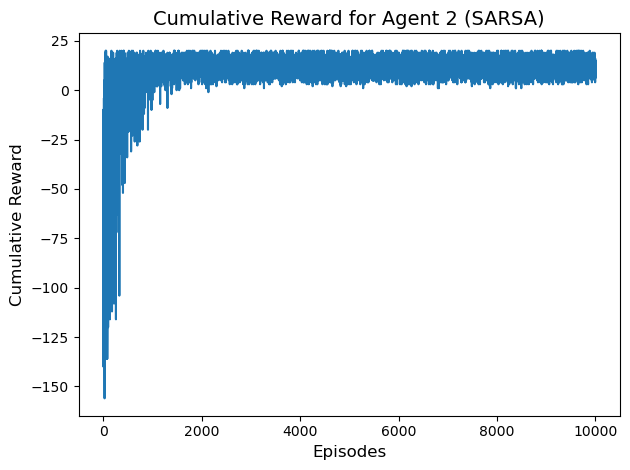

Agent 2 (SARSA) - Success Rate: 99.18%
Agent 2 (SARSA) - Average Reward: 10.11
Agent 2 (SARSA) - Average Learning Speed: 0.0949


In [11]:

plt.plot(np.arange(episodes_sarsa), rewards_per_episode_sarsa, label="Cumulative Reward")
plt.title('Cumulative Reward for Agent 2 (SARSA)', fontsize=14)
plt.xlabel('Episodes', fontsize=12)
plt.ylabel('Cumulative Reward', fontsize=12)
plt.tight_layout()
plt.show()

# Success Rate
success_rate_s = (successful_episodes_sarsa / episodes_sarsa) * 100
# Average Reward per Episode
average_reward_s = np.mean(rewards_per_episode_sarsa)
# Average Learning Speed
average_learning_speed_s = 1 / np.mean(steps_per_episode_sarsa)

# Output the results
print(f"Agent 2 (SARSA) - Success Rate: {success_rate_s:.2f}%")
print(f"Agent 2 (SARSA) - Average Reward: {average_reward_s:.2f}")
print(f"Agent 2 (SARSA) - Average Learning Speed: {average_learning_speed_s:.4f}")

# Task 3

In [12]:
import seaborn as sns

# Provides teacher advice based on availability and accuracy
def provide_teacher_advice(teacher_q_table, current_state, availability, accuracy):
    if random.uniform(0, 1) < availability:
        if random.uniform(0, 1) < accuracy:  # If the advice is correct
            return np.argmax(teacher_q_table[current_state])  
        else:
            # Returns any random incorrect action
            correct_action = np.argmax(teacher_q_table[current_state])
            possible_actions = [a for a in range(4) if a != correct_action]
            return random.choice(possible_actions)
    return None  #


Training the agent with teacher advice using Q-learning

In [13]:
def train_agent_with_teacher(env, teacher_q_table, alpha, gamma, epsilon, epsilon_decay, min_epsilon, episodes, max_steps, availability, accuracy):
    Q_table = np.zeros((env.grid_size, env.grid_size, env.action_space))  # Initialize the Q-table
  
    rewards_per_episode = []
    steps_per_episode = []
    successful_episodes = 0
    
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        steps = 0
        
        for _ in range(max_steps):
            agent_pos = (state[0], state[1])
            
            # Geting advice or following policy
            advice = provide_teacher_advice(teacher_q_table, agent_pos, availability, accuracy)
            if advice is not None:
                action = advice  # Follow teacher's advice
            else:
                action = random.choice([0, 1, 2, 3]) if random.uniform(0, 1) < epsilon else np.argmax(Q_table[agent_pos])
            
            # Take the action and observe the results
            next_state, reward, done, _ = env.step(action)
            next_agent_pos = (next_state[0], next_state[1])
            
            # Updating the Q-value using the Q-learning update rule as standard
            Q_table[agent_pos][action] += alpha * (reward + gamma * np.max(Q_table[next_agent_pos]) - Q_table[agent_pos][action])
            
            total_reward += reward
            steps += 1
            state = next_state
            
            if done:
                successful_episodes += 1
                break
        
        # Updating epsilon for the next episode
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        
        # Storing
        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)
    
    # Calculation
    success_rate_qt = (successful_episodes / episodes) * 100
    average_reward_qt = np.mean(rewards_per_episode)
    average_learning_speed_qt = 1 / np.mean(steps_per_episode)
    
    return success_rate_qt, average_reward_qt, average_learning_speed_qt


In [37]:
# Values for availability and accuracy
availability_values = [0.2, 0.4, 0.6, 0.8, 1.0]
accuracy_values = [0.2, 0.4, 0.6, 0.8, 1.0]

# same Q Table loaded from Task 1 as per assignment spec
teacher_q_table_QL = Q_table  

results = []

for availability in availability_values:
    for accuracy in accuracy_values:
        success_rate, avg_reward, avg_speed = train_agent_with_teacher(
            env, teacher_q_table_QL, alpha, gamma, epsilon, epsilon_decay, min_epsilon, episodes, max_steps, availability, accuracy
        )
        results.append((availability, accuracy, success_rate, avg_reward, avg_speed))

# DataFrame with results as per assignment spec
df_q_learning_teacher = pd.DataFrame(results, columns=['Availability', 'Accuracy', 'Success Rate (%)', 'Avg Reward', 'Avg Learning Speed'])
df_q_learning_teacher.to_csv('task3_q_learning.csv', index=False)


Plotting HEATMAP For Task 3


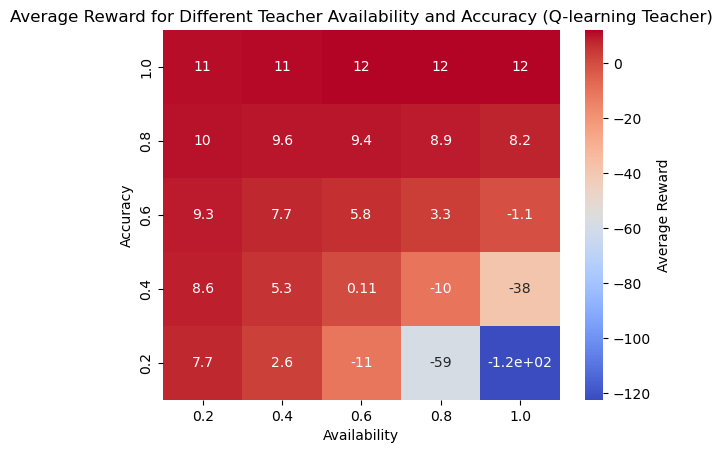

In [15]:

heatmap_data = df_q_learning_teacher.pivot(index='Accuracy', columns='Availability', values='Average Reward')
heatmap_data = heatmap_data.sort_index(ascending=False)

sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Average Reward'}, yticklabels=heatmap_data.index)
plt.title('Average Reward for Different Teacher Availability and Accuracy (Q-learning Teacher)')
plt.xlabel('Availability')
plt.ylabel('Accuracy')
plt.show()


# Task 4 

In [16]:
# Teacher advice based on availability and accuracy
def provide_teacher_advice(teacher_q_table, current_state, availability, accuracy):
    if random.uniform(0, 1) < availability:
        if random.uniform(0, 1) < accuracy:  
            return np.argmax(teacher_q_table[current_state])  
        else:
            # Returns a random incorrect action
            correct_action = np.argmax(teacher_q_table[current_state])
            possible_actions = [a for a in range(4) if a != correct_action]
            return random.choice(possible_actions)
    return None  # No advice given

Training function for the new SARSA agent with teacher advice using epsilon-greedy policy same as Task 2

In [17]:
def train_agent_with_teacher_sarsa(env, teacher_q_table, alpha, gamma, epsilon, epsilon_decay, min_epsilon, episodes, max_steps, availability, accuracy):
    # Q table for new agent
    Q_table = np.zeros((env.grid_size, env.grid_size, env.action_space))
    
    rewards_per_episode = []
    steps_per_episode = []
    successful_episodes = 0
    
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        steps = 0
        
        # Epsilon-greedy policy as per task 2
        agent_pos = (state[0], state[1])
        if random.uniform(0, 1) < epsilon:
            action = random.choice([0, 1, 2, 3])  # Exploration
        else:
            action = np.argmax(Q_table[agent_pos])  # Exploitation

        for _ in range(max_steps):
            next_state, reward, done, _ = env.step(action)
            next_agent_pos = (next_state[0], next_state[1])

            # Checking for teacher advice
            advice = provide_teacher_advice(teacher_q_table, agent_pos, availability, accuracy)
            if advice is not None:
                next_action = advice  
            else:
                if random.uniform(0, 1) < epsilon:
                    next_action = random.choice([0, 1, 2, 3])  # Exploration
                else:
                    next_action = np.argmax(Q_table[next_agent_pos])  # Exploitation

            # Updating Q-value using SARSA formula
            Q_table[agent_pos][action] += alpha * (
                reward + gamma * Q_table[next_agent_pos][next_action] - Q_table[agent_pos][action]
            )

            total_reward += reward
            steps += 1
            agent_pos = next_agent_pos
            action = next_action

            if done:
                successful_episodes += 1
                break

        # Decay epsilon after each episode
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)
    
    # Calculations
    success_rate_st = (successful_episodes / episodes) * 100
    average_reward_st = np.mean(rewards_per_episode)
    average_learning_speed_st = 1 / np.mean(steps_per_episode)
    
    return success_rate_st, average_reward_st, average_learning_speed_st


Running Training and Collecting Results

In [38]:
# Availability and accuracy values
availability_values = [0.2, 0.4, 0.6, 0.8, 1.0]
accuracy_values = [0.2, 0.4, 0.6, 0.8, 1.0]

# Using the SARSA-trained Q-table as the teacher's Q-table same as task 2 
teacher_q_table_SR = Q_table_sarsa  
results = []

for availability in availability_values:
    for accuracy in accuracy_values:
        success_rate, avg_reward, avg_speed = train_agent_with_teacher_sarsa(
            env, teacher_q_table_SR, alpha_sarsa, gamma_sarsa, epsilon_sarsa, epsilon_decay_sarsa, min_epsilon_sarsa, episodes_sarsa, max_steps_sarsa, availability, accuracy
        )
        results.append((availability, accuracy, success_rate, avg_reward, avg_speed))

# Dataframe of results as required by assignment
df_sarsa_teacher = pd.DataFrame(results, columns=['Availability', 'Accuracy', 'Success Rate (%)', 'Avg Reward', 'Avg Learning Speed'])
df_sarsa_teacher.to_csv('task4_sarsa.csv', index=False)


Heatmap of Average Reward for Task 4

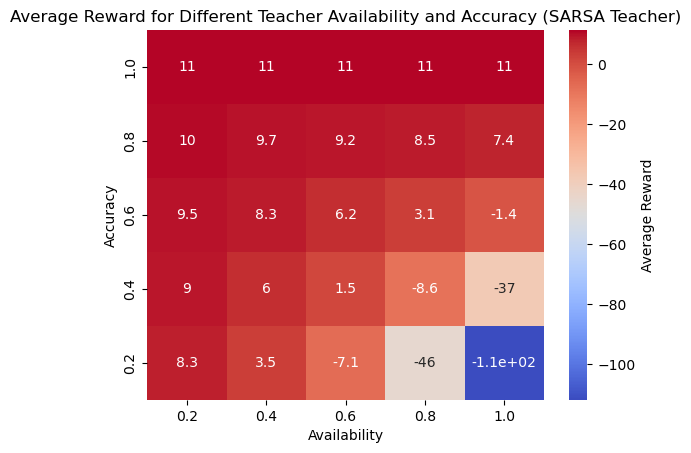

In [19]:
heatmap_data = df_sarsa_teacher.pivot(index='Accuracy', columns='Availability', values='Average Reward')
heatmap_data = heatmap_data.sort_index(ascending=False)

sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Average Reward'}, yticklabels=heatmap_data.index)
plt.title('Average Reward for Different Teacher Availability and Accuracy (SARSA Teacher)')
plt.xlabel('Availability')
plt.ylabel('Accuracy')
plt.show()


# Loading Results

In [20]:
# Example baseline metrics
Qlearning_baseline = (average_reward_q, success_rate_q, average_learning_speed_q)
Sarsa_baseline = (average_reward_s, success_rate_s, average_learning_speed_q)

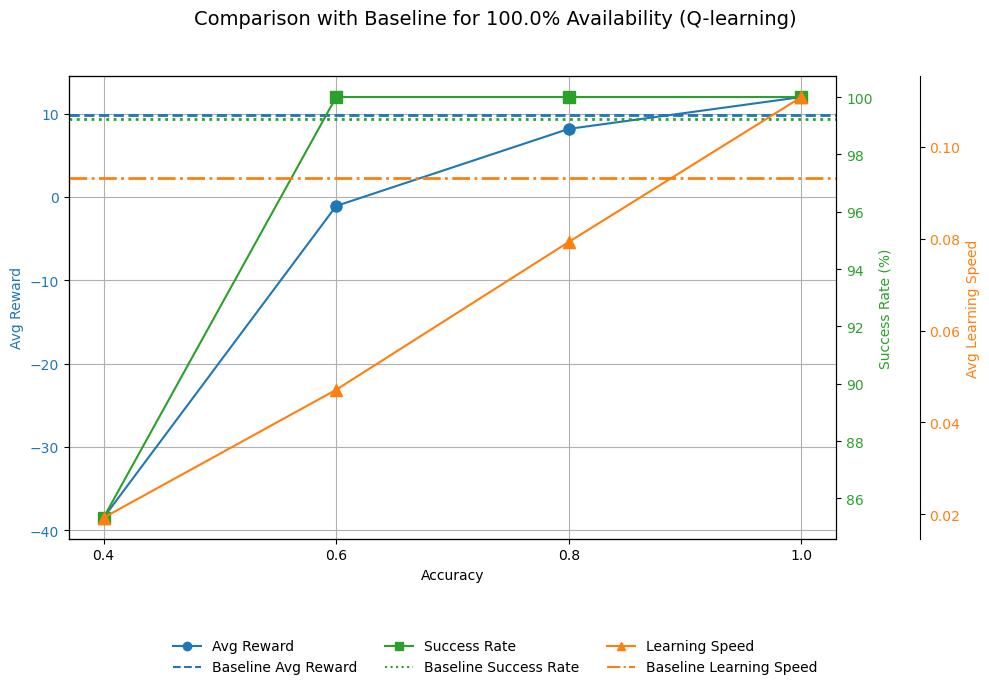

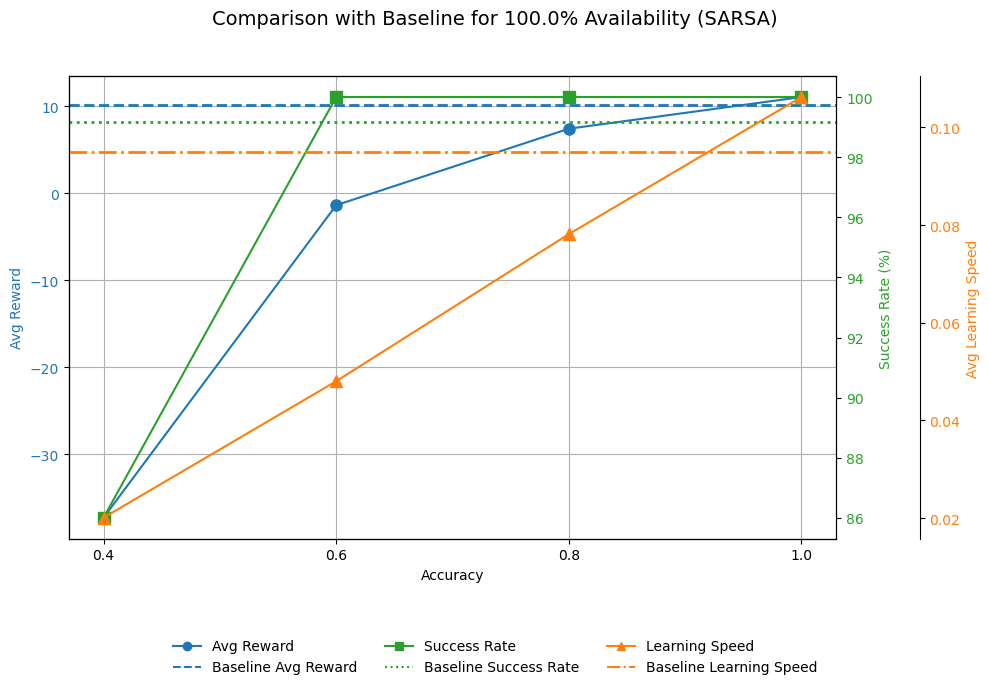

In [ ]:
from utils import plot_comparison_with_baseline

# Baseline metrics for Q-learning and SARSA
q_learning_baseline = (average_reward_q, success_rate_q, average_learning_speed_q)  # Replace with actual baseline values from Task 1
sarsa_baseline = (average_reward_s, success_rate_s, average_learning_speed_s)  # Replace with actual baseline values from Task 2

# Example availability level to analyze, and accuracies to filter
availability_level = 1.0  # Adjust as needed for analysis (e.g., full availability at 100%)
accuracies_to_compare = [0.4, 0.6, 0.8, 1.0]  # List of accuracy levels for comparison

# Plotting comparison for Q-learning with teacher advice vs. baseline
plot_comparison_with_baseline(
    availability=availability_level,
    df_learning=df_q_learning_teacher,
    baseline_learning=q_learning_baseline,
    accuracies=accuracies_to_compare,
    algorithm="Q-learning"
)

# Plotting comparison for SARSA with teacher advice vs. baseline
plot_comparison_with_baseline(
    availability=availability_level,
    df_learning=df_sarsa_teacher,
    baseline_learning=sarsa_baseline,
    accuracies=accuracies_to_compare,
    algorithm="SARSA"
)
